In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cow_builder.digital_cow import DigitalCow, state_probability_generator, \
    vector_milk_production, vector_nitrogen_emission
from cow_builder.digital_herd import DigitalHerd
from chain_simulator.simulation import state_vector_processor
from chain_simulator.utilities import validate_matrix_sum, \
    validate_matrix_negative, simulation_accumulator
from chain_simulator.assembly import array_assembler
from functools import partial
import time
import logging
import scipy

In [2]:
logging.basicConfig()
just_another_herd = DigitalHerd()

In [3]:
cow = DigitalCow(
        days_in_milk=0, lactation_number=0, days_pregnant=0,
        age=0, herd=just_another_herd, state='Open')
cow.generate_total_states(dim_limit=1000, ln_limit=9)

In [4]:
just_another_cow = DigitalCow(
        days_in_milk=0, lactation_number=1, days_pregnant=0,
        age=660, herd=just_another_herd, state='Open')
just_another_cow.generate_total_states(dim_limit=1000, ln_limit=9)

In [ ]:
tm = array_assembler(just_another_cow.node_count,
                         state_probability_generator(cow))
scipy.sparse.save_npz('transition_matrices/transition_matrix_9_lactations.npz', tm, True)
print(f"validation of the sum of rows being equal to 1: {validate_matrix_sum(tm)}")
print(f"validation of the probabilities in the matrix being positive: {validate_matrix_negative(tm)}")

In [5]:
tm = scipy.sparse.load_npz('transition_matrices/transition_matrix_9_lactations.npz')
print(f"validation of the sum of rows being equal to 1: {validate_matrix_sum(tm)}")
print(f"validation of the probabilities in the matrix being positive: {validate_matrix_negative(tm)}")

validation of the sum of rows being equal to 1: True
validation of the probabilities in the matrix being positive: True


In [6]:
simulated_days = 4900
steps = 14
simulation1 = state_vector_processor(cow.initial_state_vector, tm,
                                     simulated_days, steps)

start = time.perf_counter()
milk_accumulator1 = {}
nitrogen_accumulator1 = {}
callbacks1 = {
    "milk": partial(vector_milk_production, digital_cow=cow,
                    intermediate_accumulator=milk_accumulator1),
    "nitrogen": partial(vector_nitrogen_emission, digital_cow=cow,
                        intermediate_accumulator=nitrogen_accumulator1)
}
accumulated1 = simulation_accumulator(simulation1, **callbacks1)
end = time.perf_counter()
print(f"The time needed to iterate over the simulation "
      f"and calculate phenotype output: {end - start} seconds.")
print(f"accumulated: {accumulated1}")

The time needed to iterate over the simulation and calculate phenotype output: 137.25459170000977 seconds.
accumulated: {'milk': 19934.799489175024, 'nitrogen': 293870.6028374123}


In [7]:
simulated_days = 4900
steps = 14
simulation2 = state_vector_processor(just_another_cow.initial_state_vector, tm,
                                         simulated_days, steps)

start = time.perf_counter()
milk_accumulator2 = {}
nitrogen_accumulator2 = {}
callbacks2 = {
    "milk": partial(vector_milk_production, digital_cow=just_another_cow,
                    intermediate_accumulator=milk_accumulator2),
    "nitrogen": partial(vector_nitrogen_emission, digital_cow=just_another_cow,
                        intermediate_accumulator=nitrogen_accumulator2)
}
accumulated2 = simulation_accumulator(simulation2, **callbacks2)
end = time.perf_counter()
print(f"The time needed to iterate over the simulation "
      f"and calculate phenotype output: {end - start} seconds.")
print(f"accumulated: {accumulated2}")

The time needed to iterate over the simulation and calculate phenotype output: 104.72437759999593 seconds.
accumulated: {'milk': 29289.69805900883, 'nitrogen': 418660.9707893285}


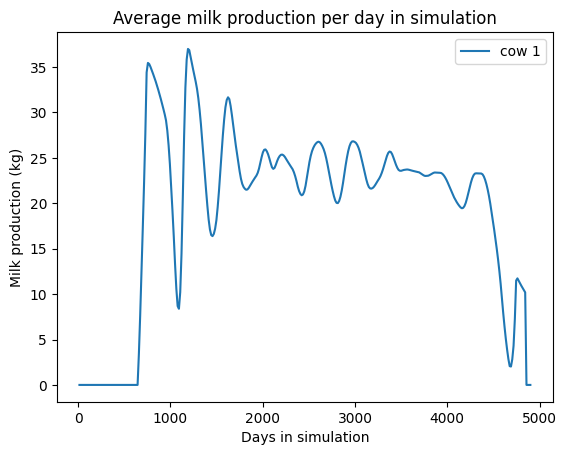

In [15]:
plt.figure()
xpoints = np.asarray([key for key in milk_accumulator1.keys()])
ypoints = np.asarray([value for value in milk_accumulator1.values()])
plt.plot(xpoints, ypoints, label='cow 1')
plt.title('Average milk production per day in simulation')
plt.ylabel('Milk production (kg)')
plt.xlabel('Days in simulation')
plt.legend()

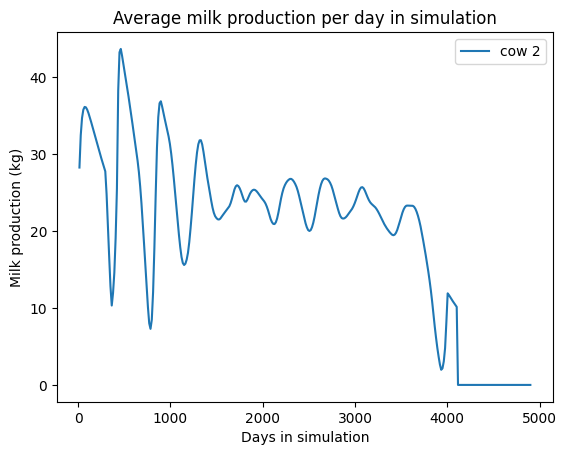

In [14]:
plt.figure()
xpoints = np.asarray([key for key in milk_accumulator2.keys()])
ypoints = np.asarray([value for value in milk_accumulator2.values()])
plt.plot(xpoints, ypoints, label='cow 2')
plt.title('Average milk production per day in simulation')
plt.ylabel('Milk production (kg)')
plt.xlabel('Days in simulation')
plt.legend()

In [10]:
plt.figure()
xpoints = np.asarray([key for key in milk_accumulator1.keys()])
ypoints = np.asarray([value for value in milk_accumulator1.values()])
plt.plot(xpoints, ypoints, label='cow 1')
xpoints = np.asarray([key for key in milk_accumulator2.keys()])
ypoints = np.asarray([value for value in milk_accumulator2.values()])
plt.plot(xpoints, ypoints, label='cow 2')
plt.title('Average milk production per day in simulation')
plt.ylabel('Milk production (kg)')
plt.xlabel('Days in simulation')
plt.legend()
plt.savefig('img/complete_simulation_2_cows_4900_days_milk_production')
plt.close()

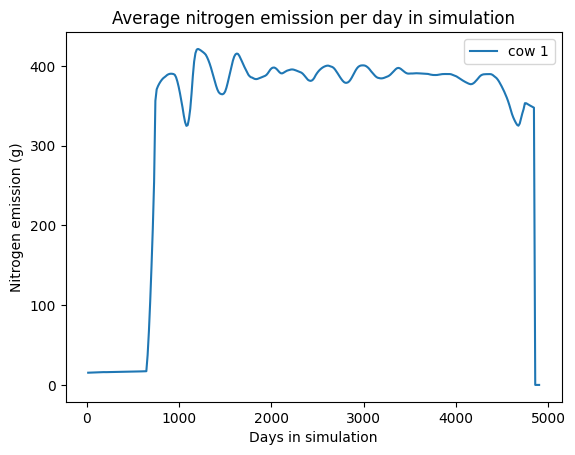

In [13]:
plt.figure()
xpoints = np.asarray([key for key in nitrogen_accumulator1.keys()])
ypoints = np.asarray([value for value in nitrogen_accumulator1.values()])
plt.plot(xpoints, ypoints, label='cow 1')
plt.title('Average nitrogen emission per day in simulation')
plt.ylabel('Nitrogen emission (g)')
plt.xlabel('Days in simulation')
plt.legend()

In [ ]:
plt.figure()
xpoints = np.asarray([key for key in nitrogen_accumulator2.keys()])
ypoints = np.asarray([value for value in nitrogen_accumulator2.values()])
plt.plot(xpoints, ypoints, label='cow 2')
plt.title('Average nitrogen emission per day in simulation')
plt.ylabel('Nitrogen emission (g)')
plt.xlabel('Days in simulation')
plt.legend()

In [11]:
plt.figure()
xpoints = np.asarray([key for key in nitrogen_accumulator1.keys()])
ypoints = np.asarray([value for value in nitrogen_accumulator1.values()])
plt.plot(xpoints, ypoints, label='cow 1')
xpoints = np.asarray([key for key in nitrogen_accumulator2.keys()])
ypoints = np.asarray([value for value in nitrogen_accumulator2.values()])
plt.plot(xpoints, ypoints, label='cow 2')
plt.title('Average nitrogen emission per day in simulation')
plt.ylabel('Nitrogen emission (g)')
plt.xlabel('Days in simulation')
plt.legend()
plt.savefig('img/complete_simulation_2_cows_4900_days_nitrogen_emission')
plt.close()